## AllLife Credit Card Customer Segmentation
### Objective


To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Import all necessary libraries and load data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# For Standard numpy and Pandas Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from scipy.stats import zscore


# plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
CustData = pd.read_excel('Credit Card Customer Data.xlsx')

## Exploratory Data Quality Report 

### General Description of the DataFrame

In [5]:
CustData.head() #View the first 5 rows of the dataframe

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
# Get information about the data frame
CustData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
# confirm the number of rows and columns in the dataframe
CustData.shape

(660, 7)

There are 7 numerical columns in the data frame and all 660 rows contain values in them.

## Univariate Analysis 

In [8]:
#Descriptive Statistics of dataframe using the describe
CustData.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.00,330.50,190.67,1.00,165.75,330.50,495.25,660.00
Customer Key,660.00,"55,141.44","25,627.77","11,265.00","33,825.25","53,874.50","77,202.50","99,843.00"
Avg_Credit_Limit,660.00,"34,574.24","37,625.49","3,000.00","10,000.00","18,000.00","48,000.00","200,000.00"
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.61,2.94,0.00,1.00,2.00,4.00,15.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


The above shows the Descriptive Statistics of the 7 numerical columns in the dataframe

In [9]:
#check for the number of unique values in each column
CustData.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

There are some rows with duplicated Customer Keys. 


In [10]:
#check for rows with duplicated customer keys
keys = CustData['Customer Key']
CustData[keys.isin(keys[keys.duplicated()])]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


There are 5 duplicated Customer Keys. Although the records are not duplicated as other columns are unique. 

Additional information may be required to determine that they are different customers since there record for Total Credit Cards is also different for each customer key. 

In [11]:
# Create Data Frame with only relevant Customer attribute information
df = CustData.iloc[:,2:]
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


### Numerical  Distributions

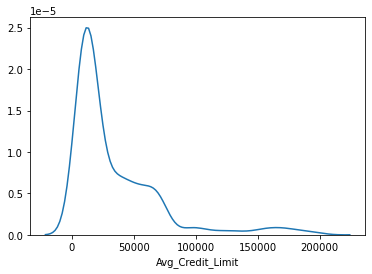

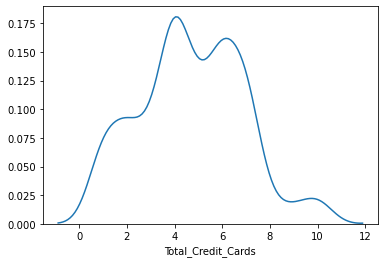

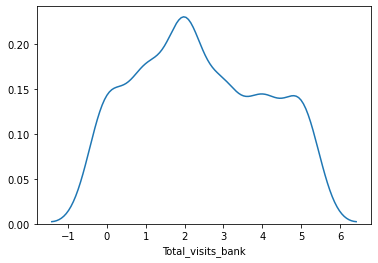

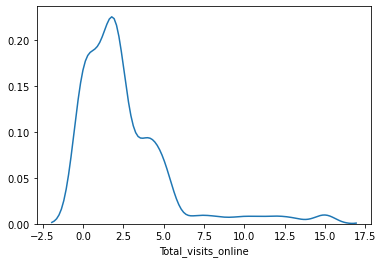

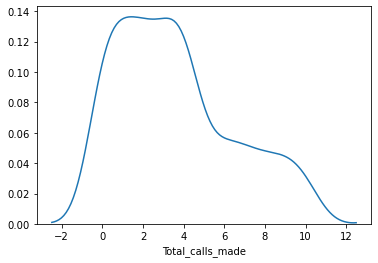

In [12]:
# Distribution of all columns in dataframe
for i in list(df.columns):
    sns.distplot(df[i], hist = False)
    plt.show()

The Avg_Credit_Limit, Total_Credit_Cards, Total_visits_online and Total_visits_bank columns all seem to have roughly 4 Clusters. Although some of the Clusters are weak clusters  

Total_calls_made column seems to have just 2 clusters

In [13]:
df.skew()

Avg_Credit_Limit      2.20
Total_Credit_Cards    0.14
Total_visits_bank     0.14
Total_visits_online   2.23
Total_calls_made      0.66
dtype: float64

The Avg_Credit_Limit and Total_visits_online are more skewed that other columns.

### Missing Values in Dataframe

In [14]:
# Check the Movie info data for missing values:
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [15]:
df.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are no missing values (as null or NA).

### Outliers in Dataframe

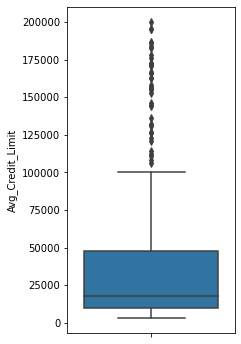

Avg_Credit_Limit: 39 data points are outliers
6% of Avg_Credit_Limit data are no where near the quartiles


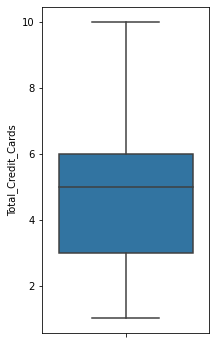

Total_Credit_Cards: 0 data points are outliers
0% of Total_Credit_Cards data are no where near the quartiles


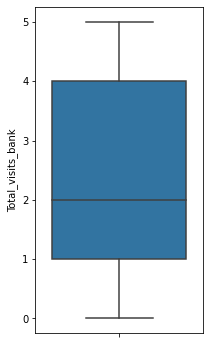

Total_visits_bank: 0 data points are outliers
0% of Total_visits_bank data are no where near the quartiles


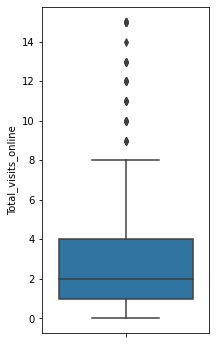

Total_visits_online: 37 data points are outliers
6% of Total_visits_online data are no where near the quartiles


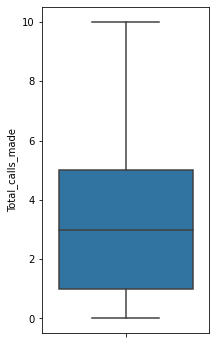

Total_calls_made: 0 data points are outliers
0% of Total_calls_made data are no where near the quartiles


In [16]:
# Outlier Analysis of Numerical variables using Box Plot
for i in list(df.columns): 
    plt.figure(figsize=(3,6))
    sns.boxplot(y=df[i])
    plt.show()
    print(str(i) +': ' + str (df[(df[i]<(df[i].quantile(0.25)-(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25))))) | (df[i]>(df[i].quantile(0.75)+(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25)))))].shape[0]) +' data points are outliers')
    print(str(round((df[(df[i]<(df[i].quantile(0.25)-(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25))))) | (df[i]>(df[i].quantile(0.75)+(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25)))))].shape[0]/df.shape[0])*100))+'% of '+str(i)+ ' data are no where near the quartiles')

The Avg_Credit Limit and Total_visits_online have roughly 6% of their data as outliers
    

## Multivariate Analysis 

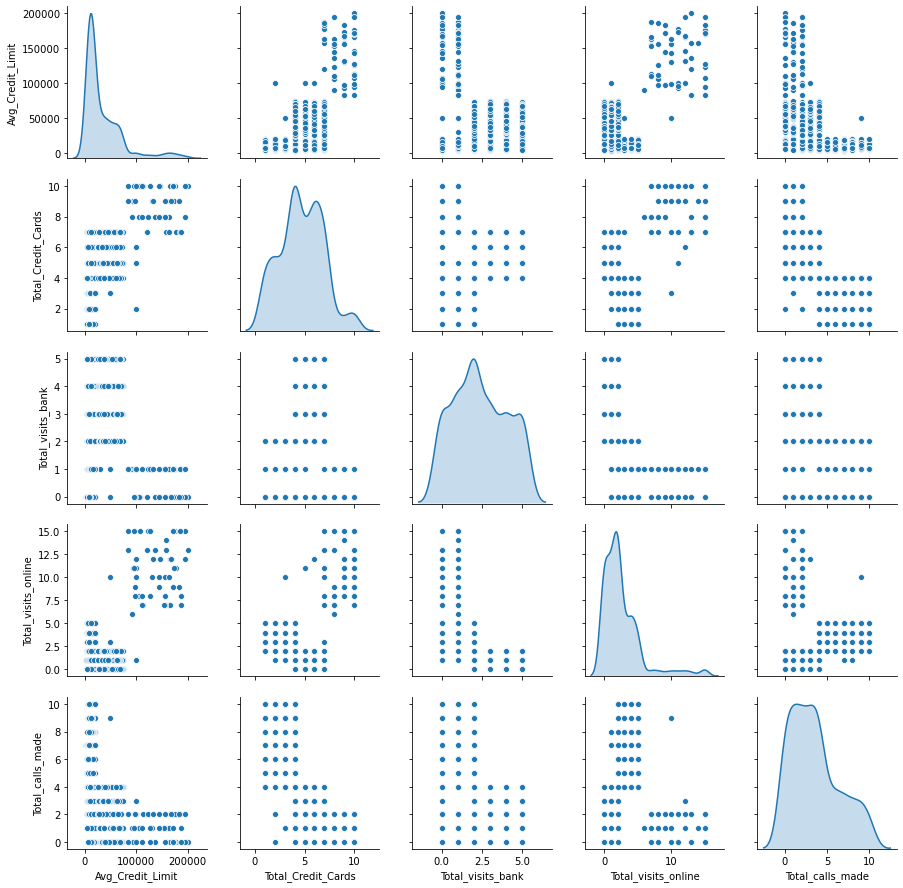

In [17]:
sns.pairplot(df, diag_kind = 'kde')

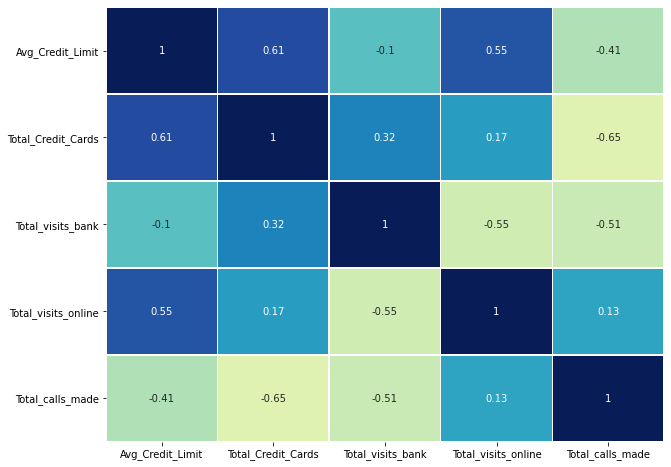

In [18]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

There is a strong negative correlation between Total_Credit_Cards and Total_calls_made and as such we can infer that customers with multiple credit cards hardly call the bank. 

There is a strong positive correlation between Avg_Credit_Limit and Total_Credit_Cards. From this we can infer that the customers would multiple creditcards tend to have higher credit limits. 

There is a medium negative correlation between Total_visits_online and Total_visits_bank. From this we can infer that the customers who tend to visit the bank's online page tend not to come to the bank physically. 

There is a medium negative correlation between Total_calls_made and Total_visits_bank. From this we can infer that the customers who call the bank tend not to visit the bank physically. 

No visible relationship/correlation among other attributes. 

## Execution of K-Means Clustering on Data Set 

### Scale the Data

In [19]:
# Use the Z score scaler to scale the data 
custDataScaled=df.apply(zscore)
custDataScaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20
5,-0.39,-0.79,-1.47,-0.55,1.54
6,1.74,0.14,-1.47,2.86,-0.55
7,-0.52,-0.79,-1.47,-0.55,-0.90
8,-0.79,-1.25,-1.47,-0.21,-0.55
9,-0.84,-0.33,-1.47,-0.55,1.19


All the attributes are now of thesame standard values 

### Determine Optimal Number of Clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

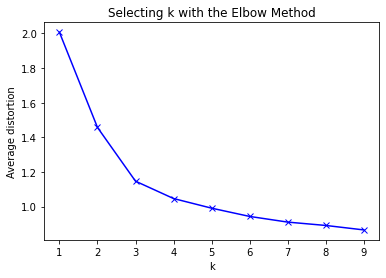

In [20]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(custDataScaled)
    prediction=model.predict(custDataScaled)
    meanDistortions.append(sum(np.min(cdist(custDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / custDataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


The number of Clusters seem to be between 3 and 4.

### Analysis of 3 and 4 Clusters

In [21]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(custDataScaled)
kclusters_3=final_model.predict(custDataScaled)

#Append the prediction 
CustData["K3_GROUP"] = kclusters_3
df['GROUP'] = kclusters_3
custDataScaled["GROUP"] = kclusters_3
print("Groups Assigned : \n")
CustData.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K3_GROUP
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
4,5,47437,100000,6,0,12,3,1


In [22]:
CustClust = df.groupby(['GROUP'])
CustClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,"12,174.11",2.41,0.93,3.55,6.87
1,"141,040.00",8.74,0.60,10.90,1.08
2,"33,782.38",5.52,3.49,0.98,2.00


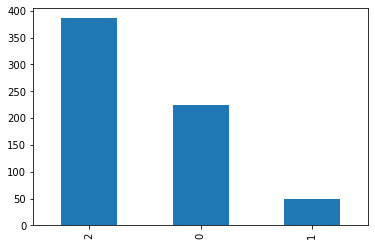

In [23]:
pd.value_counts(df["GROUP"]).plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018240ACDD68>,
      dtype=object)

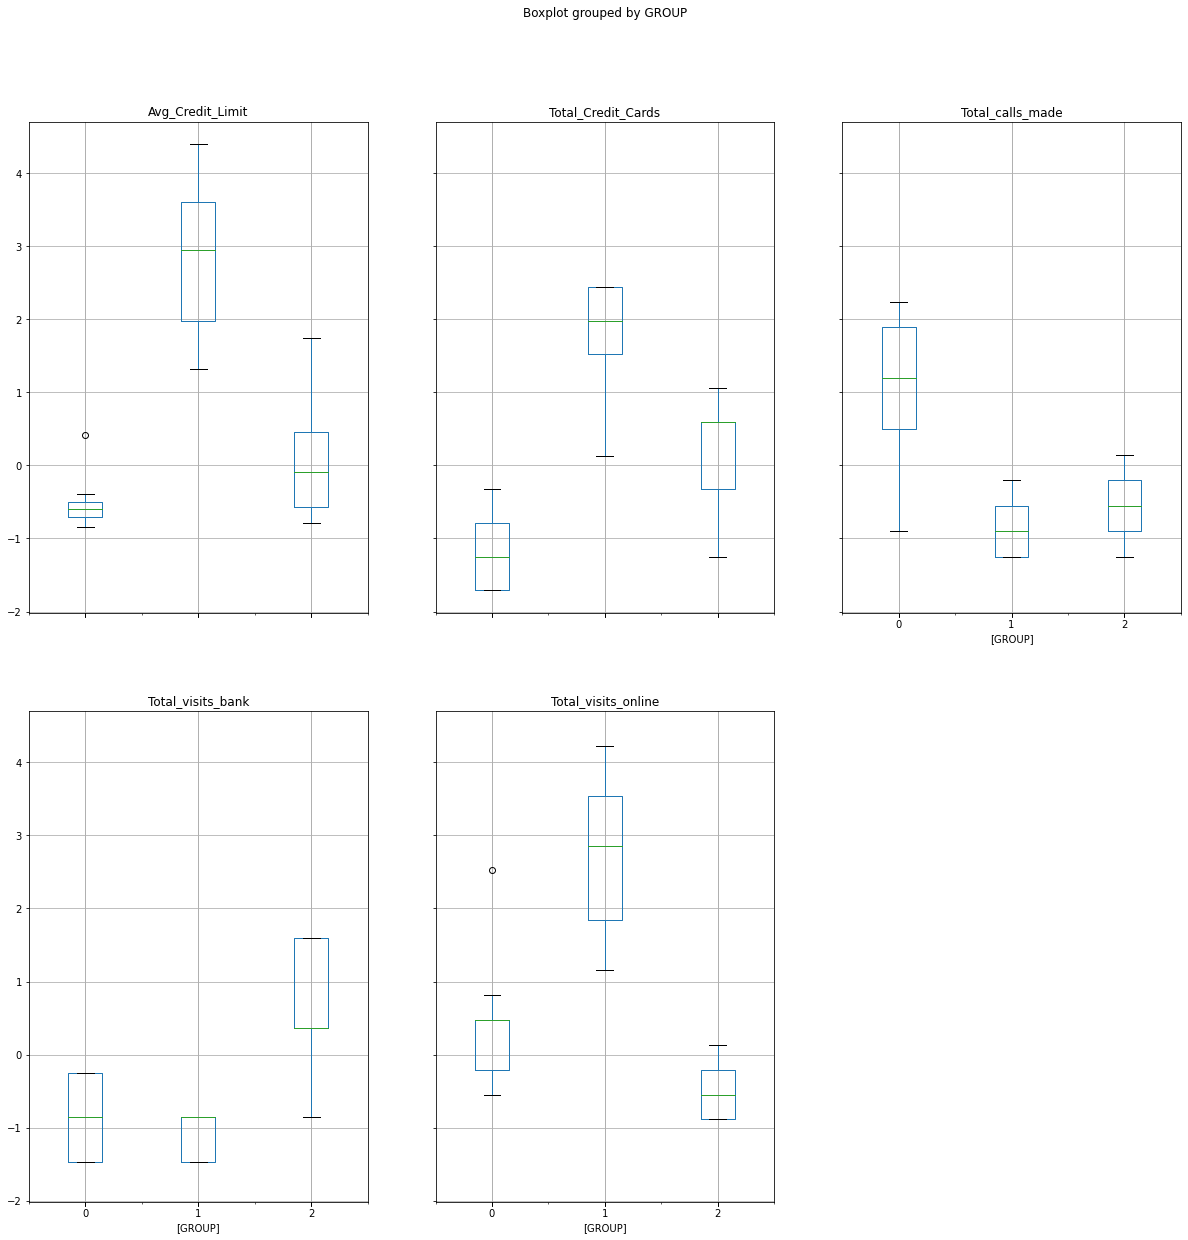

In [24]:
custDataScaled.boxplot(by='GROUP', layout = (2,3),figsize=(20,20))

In [25]:
custDataScaled = custDataScaled.drop('GROUP', axis =1)
custDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


In [26]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(custDataScaled)
kclusters_4=final_model.predict(custDataScaled)

#Append the prediction 
CustData["K4_GROUP"] = kclusters_4
df["GROUP"] = kclusters_4
custDataScaled["GROUP"] = kclusters_4
print("Groups Assigned : \n")
CustData.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K3_GROUP,K4_GROUP
0,1,87073,100000,2,1,1,0,2,1
1,2,38414,50000,3,0,10,9,0,0
2,3,17341,50000,7,1,3,4,2,1
3,4,40496,30000,5,1,1,4,2,1
4,5,47437,100000,6,0,12,3,1,3


In [27]:
CustClust = df.groupby(['GROUP'])
CustClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,"12,167.42",2.39,0.93,3.57,6.92
1,"35,904.52",5.52,2.48,0.97,2.08
2,"31,226.32",5.48,4.52,1.01,1.94
3,"141,040.00",8.74,0.60,10.90,1.08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018248ABA2B0>,
      dtype=object)

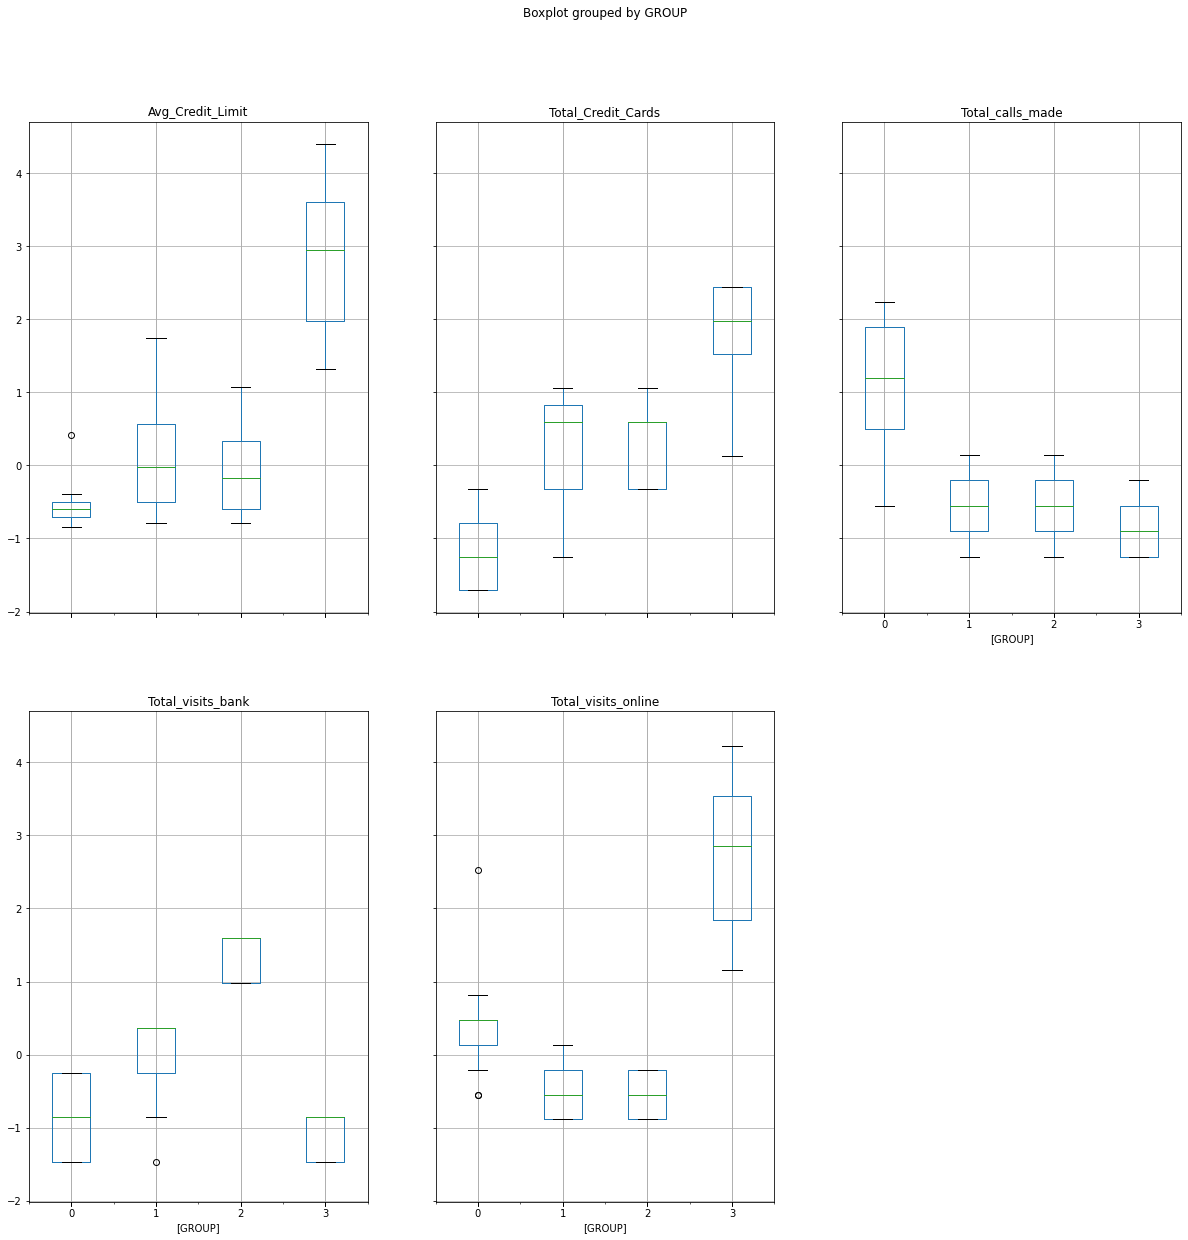

In [28]:
custDataScaled.boxplot(by='GROUP', layout = (2,3),figsize=(20,20))

From the Box Plot, using 3 Clusters presents a more distinct difference in the features than 4 Clusters.

## Execution of Hierarchical Clustering on Data Set

In [29]:
custDataScaled = custDataScaled.drop('GROUP', axis =1)
custDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


Single Linkage Method 


In [30]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

print (c)

c_single = c

0.7391220243806552


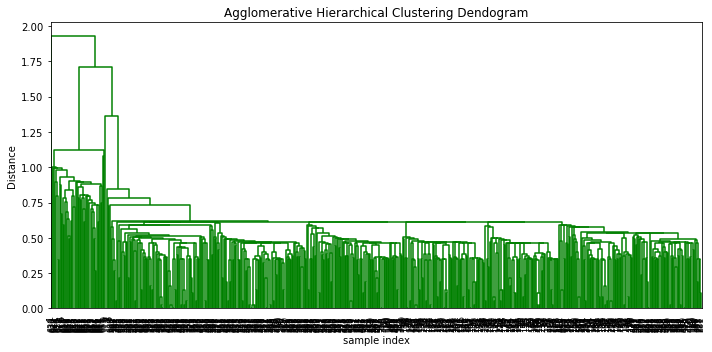

In [31]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold = 40, leaf_font_size=8., truncate_mode = 'level')
plt.tight_layout()

Complete Linkage Method

In [32]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

print (c)

c_complete = c

0.8599730607972423


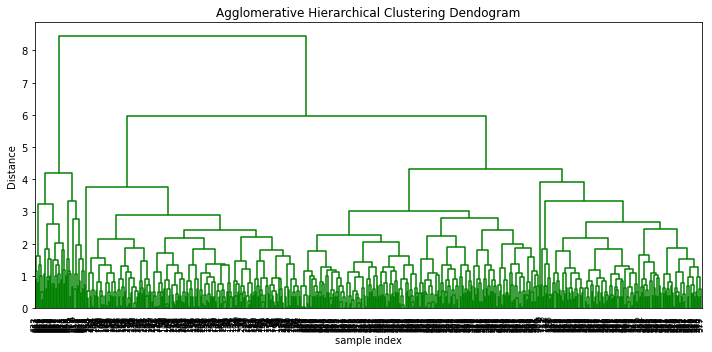

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold = 40, leaf_font_size=8., truncate_mode = 'level')
plt.tight_layout()

Average Linkage Method

In [34]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

print (c)

c_average = c

0.8977080867389372


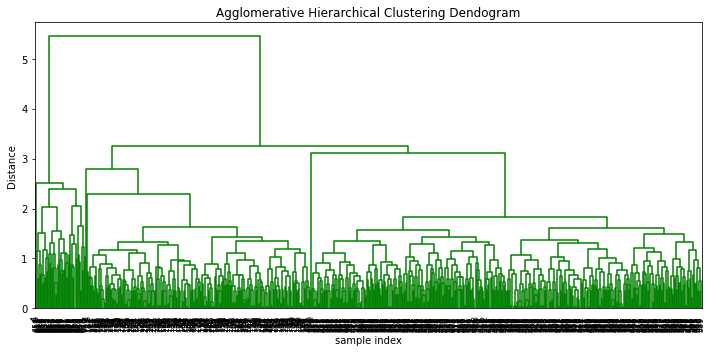

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold = 40, leaf_font_size=8., truncate_mode = 'level')
plt.tight_layout()

Ward Linkage Method

In [36]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

print (c)

c_ward = c

0.7415156284827493


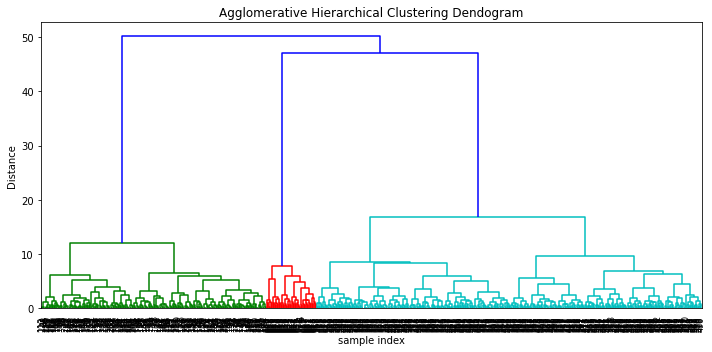

In [37]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold = 40, leaf_font_size=8., truncate_mode = 'level')
plt.tight_layout()

Weighted Linkage Method

In [38]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(custDataScaled, metric='euclidean', method='weighted')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

print (c)

c_weighted = c

0.8861746814895477


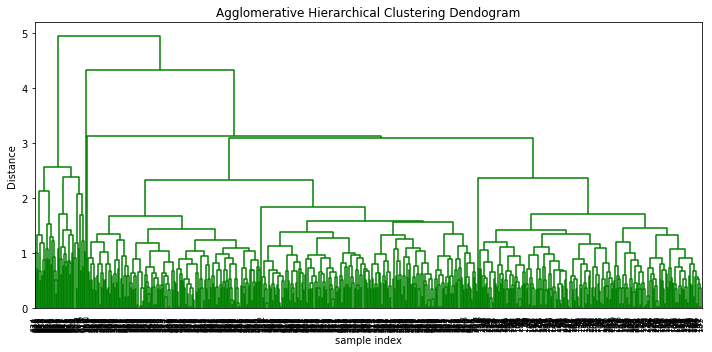

In [39]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold = 40, leaf_font_size=8., truncate_mode = 'level')
plt.tight_layout()

In [40]:
#Store the C score results for each Linkage Method in a dataframe for comparison
Summary_Df = pd.DataFrame({'Method':['Single','Complete','Average','Ward','Weighted'], 'Cophenet Index': [c_single,c_complete,c_average,c_ward,c_weighted] })
Summary_Df

,Method,Cophenet Index
0,Single,0.74
1,Complete,0.86
2,Average,0.90
3,Ward,0.74
4,Weighted,0.89


The Average Linkage Method is the best as it has the highest Cophenet Index tending towards 1

#### Dendogram Truncation

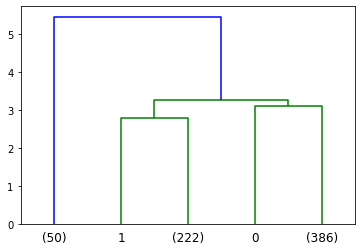

In [41]:
Z = linkage(custDataScaled, metric='euclidean', method='average')

# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

#### Create 3 Clusters using Hierarchical Clustering 

In [42]:
#Selecting a Distance Cut-Off to Determine the Number of Clusters
max_d= 3.2 # this value produces 3 clusters

In [43]:
# Display array showing 3 Clusters
from scipy.cluster.hierarchy import fcluster
hclusters_3 = fcluster(Z, max_d, criterion='distance')
hclusters_3

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

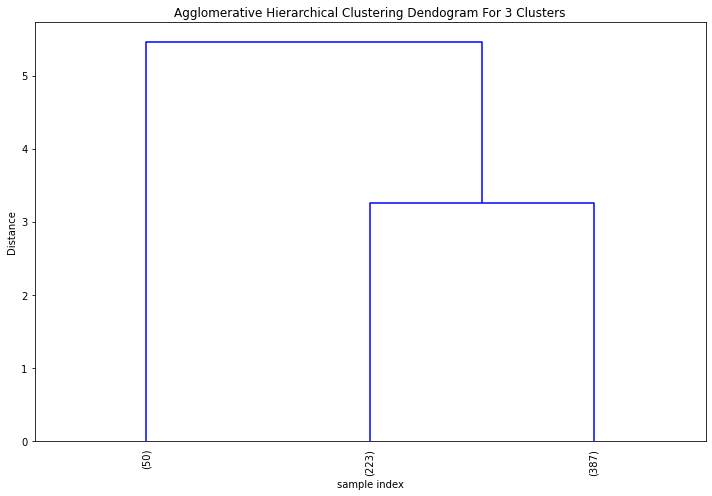

In [44]:
# Final Dendogram using the average linkage method to show 3 Clusters 

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title('Agglomerative Hierarchical Clustering Dendogram For 3 Clusters')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(custDataScaled,'average')
dendrogram(Z,leaf_rotation=90.0,color_threshold=1.5,leaf_font_size=10,truncate_mode='lastp',p=3)
plt.tight_layout()

In [45]:
#Append the prediction 
CustData["H3_GROUP"] = hclusters_3
df["GROUP"] = hclusters_3
custDataScaled["GROUP"] = hclusters_3
print("Groups Assigned : \n")
CustData.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K3_GROUP,K4_GROUP,H3_GROUP
0,1,87073,100000,2,1,1,0,2,1,3
1,2,38414,50000,3,0,10,9,0,0,2
2,3,17341,50000,7,1,3,4,2,1,3
3,4,40496,30000,5,1,1,4,2,1,3
4,5,47437,100000,6,0,12,3,1,3,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182495AE780>,
      dtype=object)

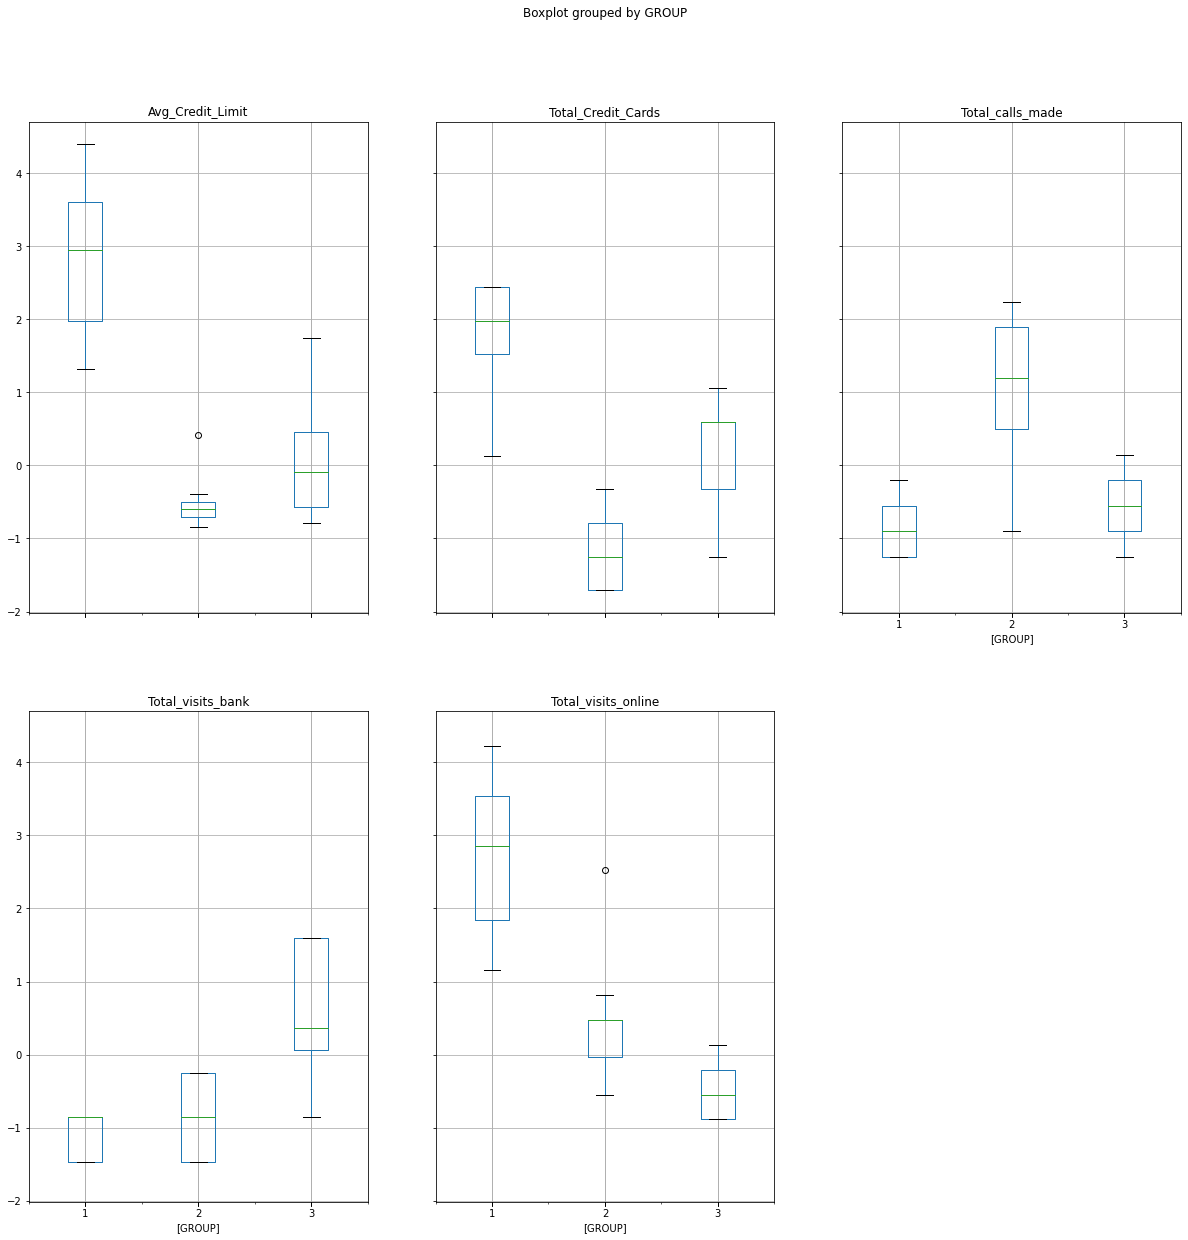

In [46]:
custDataScaled.boxplot(by='GROUP', layout = (2,3),figsize=(20,20))

#### Create 4 Clusters using Hierarchical Clustering


In [47]:
#Selecting a Distance Cut-Off to Determine the Number of Clusters
max_d= 2.8 # this value produces 4 clusters

In [48]:
# Display array showing 3 Clusters
from scipy.cluster.hierarchy import fcluster
hclusters_4 = fcluster(Z, max_d, criterion='distance')
hclusters_4

array([4, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

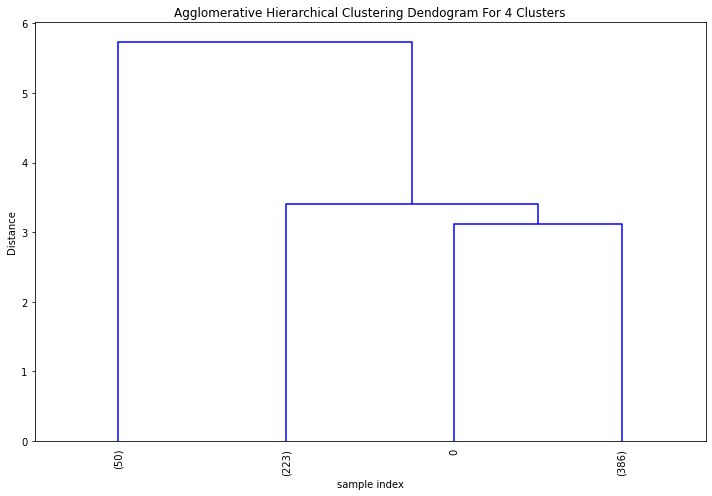

In [49]:
# Final Dendogram using the average linkage method to show 4 Clusters 

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title('Agglomerative Hierarchical Clustering Dendogram For 4 Clusters')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(custDataScaled,'average')
dendrogram(Z,leaf_rotation=90.0,color_threshold=1.5,leaf_font_size=10,truncate_mode='lastp',p=4)
plt.tight_layout()

In [50]:
#Append the prediction 
CustData["H4_GROUP"] = hclusters_4
df["GROUP"] = hclusters_4
custDataScaled["GROUP"] = hclusters_4
print("Groups Assigned : \n")
CustData.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K3_GROUP,K4_GROUP,H3_GROUP,H4_GROUP
0,1,87073,100000,2,1,1,0,2,1,3,4
1,2,38414,50000,3,0,10,9,0,0,2,2
2,3,17341,50000,7,1,3,4,2,1,3,3
3,4,40496,30000,5,1,1,4,2,1,3,3
4,5,47437,100000,6,0,12,3,1,3,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001824944DC18>,
      dtype=object)

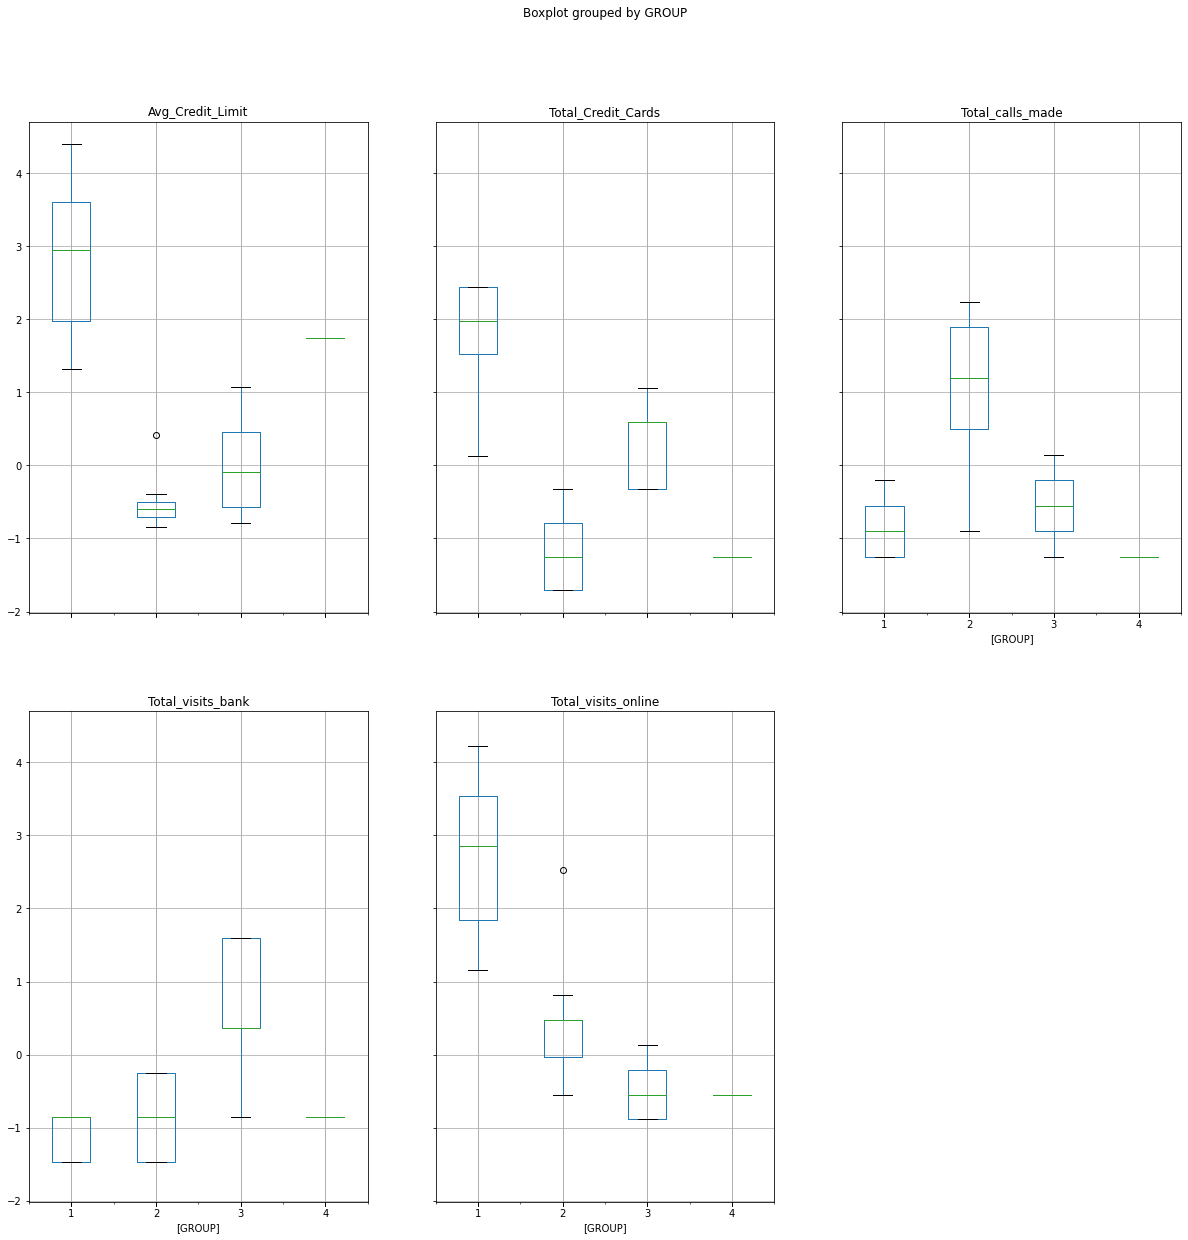

In [51]:
custDataScaled.boxplot(by='GROUP', layout = (2,3),figsize=(20,20))

## Calculate average silhouette score for both methods

In [52]:
custDataScaled = custDataScaled.drop('GROUP', axis =1)
custDataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


In [53]:
# Calculate Avg Silhoutte Score
from sklearn.metrics import silhouette_score
print (f'Silhouette Score for K-Means Clustering (n=3): {silhouette_score(custDataScaled,kclusters_3)}')
print (f'Silhouette Score for K-Means Clustering (n=4): {silhouette_score(custDataScaled,kclusters_4)}')
print (f'Silhouette Score for Hierachical Clustering (n=3): {silhouette_score(custDataScaled,hclusters_3)}')   
print (f'Silhouette Score for Hierachical Clustering (n=4): {silhouette_score(custDataScaled,hclusters_4)}')       

Silhouette Score for K-Means Clustering (n=3): 0.5157182558881063
Silhouette Score for K-Means Clustering (n=4): 0.3556670619372605
Silhouette Score for Hierachical Clustering (n=3): 0.515922432650965
Silhouette Score for Hierachical Clustering (n=4): 0.47495143595793504


Both mehods give almost thesame Silhoutte score for 3 Clusters while the Hierarchical Clustering method gives a better score when we increase the number of clusters to 4

## Compare K-means clusters with Hierarchical clusters.

#### For 3 Clusters 

In [54]:
df_kmeans_3 = CustData.drop(columns=['Sl_No','Customer Key','K4_GROUP','H3_GROUP','H4_GROUP'])
df_kmeans_3.groupby('K3_GROUP').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K3_GROUP,,,,,
0,"12,174.11",2.41,0.93,3.55,6.87
1,"141,040.00",8.74,0.60,10.90,1.08
2,"33,782.38",5.52,3.49,0.98,2.00


In [55]:
df_HCluster_3 = CustData.drop(columns=['Sl_No','Customer Key','K4_GROUP','K3_GROUP','H4_GROUP'])
df_HCluster_3.groupby('H3_GROUP').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
H3_GROUP,,,,,
1,"141,040.00",8.74,0.60,10.90,1.08
2,"12,197.31",2.40,0.93,3.56,6.88
3,"33,713.18",5.51,3.49,0.98,2.01


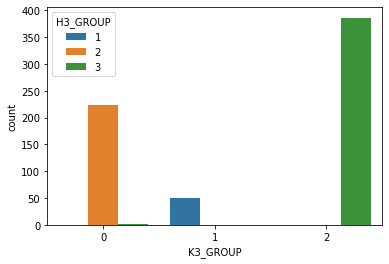

In [56]:
sns.countplot(CustData['K3_GROUP'],hue=CustData['H3_GROUP']);

Both Methods give rise to the almost thesame number of customers in the various clusters for 3 Clusters.

#### For 4 Clusters

In [57]:
df_kmeans_4 = CustData.drop(columns=['Sl_No','Customer Key','K3_GROUP','H3_GROUP','H4_GROUP'])
df_kmeans_4.groupby('K4_GROUP').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K4_GROUP,,,,,
0,"12,167.42",2.39,0.93,3.57,6.92
1,"35,904.52",5.52,2.48,0.97,2.08
2,"31,226.32",5.48,4.52,1.01,1.94
3,"141,040.00",8.74,0.60,10.90,1.08


In [58]:
df_HCluster_4 = CustData.drop(columns=['Sl_No','Customer Key','K4_GROUP','K3_GROUP','H3_GROUP'])
df_HCluster_4.groupby('H4_GROUP').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
H4_GROUP,,,,,
1,"141,040.00",8.74,0.60,10.90,1.08
2,"12,197.31",2.40,0.93,3.56,6.88
3,"33,541.45",5.52,3.49,0.98,2.01
4,"100,000.00",2.00,1.00,1.00,0.00


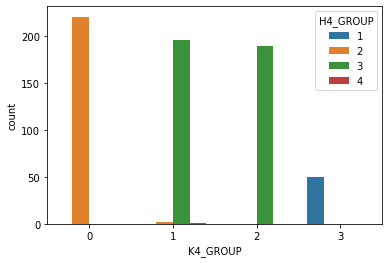

In [59]:
sns.countplot(CustData['K4_GROUP'],hue=CustData['H4_GROUP']);


Both methods yield different results for 4 Clusters. 

The Hierarchical method hardly has just one customer in its smallest cluster while Kmeans has close to 45 customers.

Hierarchical Clustering is not suitable for large data set.

## Analysis Clusters and Answer to Key Questions

In [60]:
df_kmeans_4 = CustData.drop(columns=['Sl_No','Customer Key','K4_GROUP','H3_GROUP','H4_GROUP'])
df_kmeans_4.groupby('K3_GROUP').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K3_GROUP,,,,,
0,"12,174.11",2.41,0.93,3.55,6.87
1,"141,040.00",8.74,0.60,10.90,1.08
2,"33,782.38",5.52,3.49,0.98,2.00


#### How many different segments of customers are there?

There are three different Segments of Customers.

#### How are these segments different from each other?

First Segment: They may be the Elderly
1. They have an Average Credit Limit of about 34,000.
2. They own an average of 5 credit cards.
3. They prefer to visit the bank whenever they have queries. 
4. They rarely contact the bank via telephone or visit the banks website.

Second Segment:They may be Students
1. They have an Average Credit Limit of about 12,000
2. They own an average of 3 Credit Cards.
3. They prefer calling the bank whenever they have querries.
4. They rarely contact the bank visit the bank and sometimes they visit the banks website. 

Third Segment: They may be Working Class
1. They have an Avarage Credit Limit of about 141,000.
2. On the average they own 9 Credit Cards.
3. They prefer visiting the bank's website whenever they have querries.
4. They rarely visit the bank or contact the bank through phone calls.


#### What are your recommendations to the bank on how to better market to and service these customers?

For First Segment:
The best way to campaign to these customers is to target them when they visit the bank. 
Support service delivery in the banking hall is what gives them customer satisfaction.

For the Second Segment:
The best way to campaign to these customers is via telephone calls. 
Service delivery should focus on phone calls and attimes banking hall services.

For the Third Segment:
The best form of camoaign to these customers would be via e-mails and adverts on the banks websites. 
Service delivery for them should focus on user friendly websites for ease of transactions.